In [2]:
import numpy as np
from pyproj import CRS, Transformer
from tqdm import tqdm

# 计算各个纬度上的格网面积
latitudes = np.arange(-90, 90, 0.1)  # 从-90度到90度，步长为0.1度
longitudes = np.arange(-180, 180, 0.1)  # 从-180度到180度，步长为0.1度

areas = np.empty((latitudes.size, longitudes.size))

# 创建一个投影转换器
transformer = Transformer.from_crs(CRS.from_epsg(4326), CRS.from_epsg(6933), always_xy=True)

# 创建一个带有进度条的循环
for i in tqdm(range(len(latitudes)), desc="Processing", ncols=70):
    lat = latitudes[i]
    for j in range(len(longitudes)):
        lon = longitudes[j]
        
        # 坐标转换并计算面积
        x1, y1 = transformer.transform(lon, lat)
        x2, y2 = transformer.transform(lon+0.1, lat)
        x3, y3 = transformer.transform(lon+0.1, lat+0.1)
        x4, y4 = transformer.transform(lon, lat+0.1)
        
        # 计算面积
        area = 0.5 * abs((x1*y2 + x2*y3 + x3*y4 + x4*y1) - (y1*x2 + y2*x3 + y3*x4 + y4*x1))
        areas[i, j] = area

Processing: 100%|█████████████████| 1800/1800 [00:59<00:00, 30.46it/s]


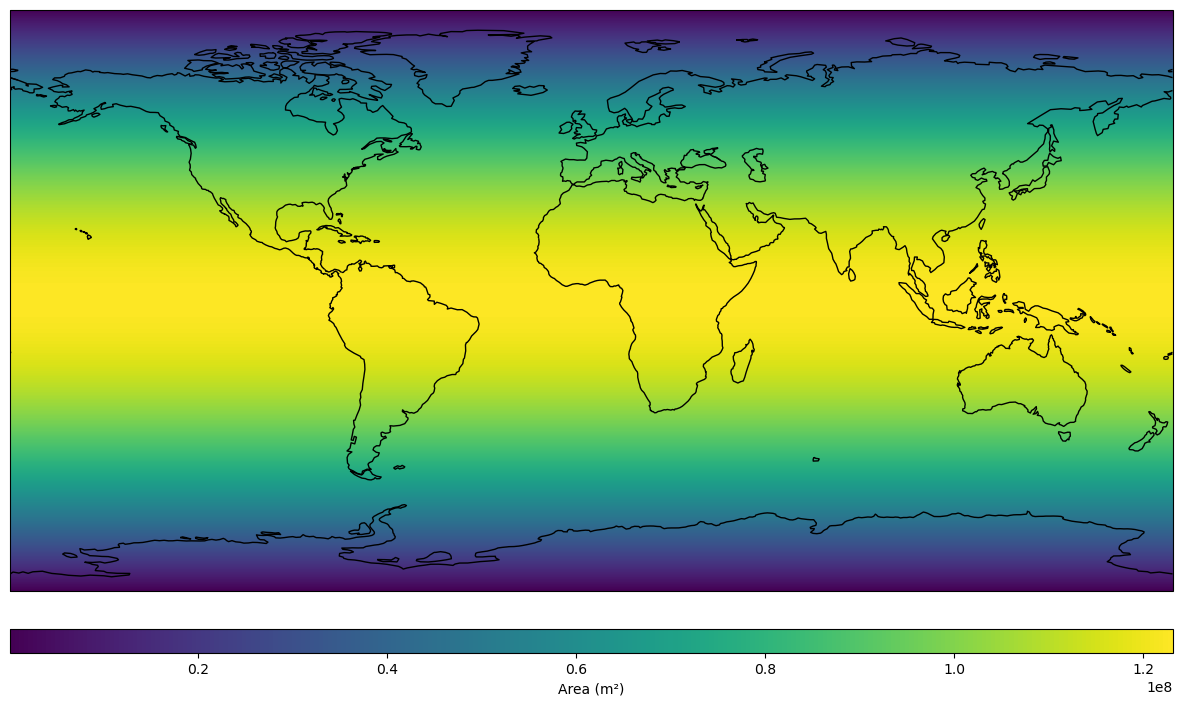

In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 用cartopy创建地图
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# 添加海洋
ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='white')

# 添加海岸线
ax.coastlines()

# 绘制面积数据
img = ax.imshow(areas, extent=[-180, 180, -90, 90], transform=ccrs.PlateCarree(), cmap='viridis', origin='lower')

# 添加颜色条
cbar = plt.colorbar(img, orientation='horizontal', pad=0.05, aspect=50)
cbar.set_label('Area (m²)')

# 显示地图
plt.show()
